In [14]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt 
plt.gray()

image = cv2.imread("C:\\Users\\leonh\\Pictures\\BumS\\Projekt\\Kos.jpg",0)
#plt.imshow(img)

#gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gauss = cv2.GaussianBlur(image, None, 1)

#plt.imshow(gauss)

t, seg = cv2.threshold(gauss, 0, 1, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

cnts, hierarchy = cv2.findContours(seg, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 

len(cnts)



1609

<Figure size 640x480 with 0 Axes>

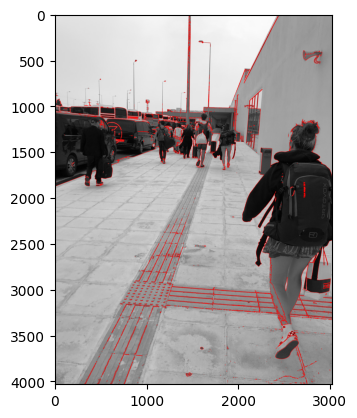

In [15]:
out = cv2.merge( (img, img, img) )

#%% Äusseren Kontoren in ein Bild zeichnen
for i in range(len(cnts)):                        
    cv2.drawContours(out, cnts, i, [255,0,0], 2) 

plt.imshow(out)

In [16]:
count_Kreise = 0
count_Linien = 0

for c in cnts:
    A = cv2.contourArea(c)
    U = cv2.arcLength( c, True)
    circle_index = U**2/(4*np.pi*A)
    if circle_index > 1.2:
        color=[0,0,0]
        count_Schraube = count_Linien +1
    else:
        color=[0,255,0]
        count_Mutter = count_Kreise +1
    cv2.drawContours(out, [c], 0, color,2)
    
plt.imshow(out)

ZeroDivisionError: float division by zero